# FORESEE Models: Up-philic Scalar

## Load Libraries 

In [1]:
import numpy as np
import sys
import os
src_path = "../../"
sys.path.append(src_path)
from src.foresee import Foresee, Utility, Model
from matplotlib import pyplot as plt

## 1. Specifying the Model

The phenomenology of the up-philic Scalar $S$ can be described by the following Lagrangian

\begin{equation}
 \mathcal{L} =  - \frac{1}{2} \color{red}{m_{S}}^2\ S^2  - \color{red}{g_u} \bar u \ u \ S
\end{equation}

with the scalar mass $m_{S}$ and the coupling parameter $g_u$ as free parameters. 

In [2]:
energy = "13.6"
modelname="UpPhilic"
model = Model(modelname, path="./")

**Production** The up-philic Scalar is mainly produced in $\eta$, $\eta'$ and kaon decays. The branching fractions are:

\begin{equation}
    \text{BR}(\eta \to \pi^0  S) = 1.26 \cdot 10^{5} \times [(1-(m_\pi+m_a)^2/m_\eta^2)(1-(m_\pi-m_a)^2/m_\eta^2)]^{1/2}\times  g_u^2 
\end{equation}

\begin{equation}
    \text{BR}(\eta' \to \pi^0 S) = 2.73 \cdot 10^{2} \times [(1-(m_\pi+m_a)^2/m_{\eta'}^2)(1-(m_\pi-m_a)^2/m_{\eta'}^2)]^{1/2}\times  g_u^2 
\end{equation}

\begin{equation}
    \text{BR}(K^+ \to \pi^+ S) = 7.42 \times [(1-(m_\pi+m_a)^2/m_K^2)(1-(m_\pi-m_a)^2/m_K^2)]^{1/2} \times  g_u^2 
\end{equation}


In the following, we model the production using `EPOSLHC`, `SIBYLL`, `QGSJET`, and `Pythia8-Forward`. 

In [3]:
model.add_production_2bodydecay(
    pid0 = "221",
    pid1 = "111",
    br = "1.26e5 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.547**2)*(1-(mass-0.135)**2/0.547**2))",
    generator = ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward'],
    energy = energy,
    nsample = 1000,
)

model.add_production_2bodydecay(
    pid0 = "331",
    pid1 = "111",
    br = "273. * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.957**2)*(1-(mass-0.135)**2/0.957**2))",
    generator = ['EPOSLHC', 'SIBYLL', 'Pythia8-Forward'],
    energy = energy,
    nsample = 100,
)

In [4]:
model.add_production_2bodydecay(
    pid0 = "321",
    pid1 = "211",
    br = "7.42 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.49368**2)*(1-(mass-0.135)**2/0.49368**2))",
    generator = ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward'],
    energy = energy,
    nsample = 100,
)

model.add_production_2bodydecay(
    pid0 = "-321",
    pid1 = "-211",
    br = "7.42 * coupling**2 * np.sqrt((1-(mass+0.135)**2/0.49368**2)*(1-(mass-0.135)**2/0.49368**2))",
    generator = ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward'],
    energy = energy,
    nsample = 100,
)

**Decay:** The up-philic scalar mainly decays to photons and pions. Here we use the lifetime and the decay branching fractions as presented in [1812.05103](https://arxiv.org/abs/1812.05103). 

In [5]:
model.set_ctau_1d(
    filename="model/ctau.txt", 
)

decay_modes = ["gamma", "pi0_pi0", "pi+_pi-", ] 
model.set_br_1d(
    modes = decay_modes,
    finalstates=[[22,22], [111,111], [221,-211]],
    filenames=["model/br/"+mode+".txt" for mode in decay_modes],
)

We can now initiate FORESEE with the model that we just created. 

In [6]:
foresee = Foresee(path=src_path)
foresee.set_model(model=model)

## 2. Event Generation

In the following, we want to study one specific benchmark point with $m_{A'}=280$ MeV and $\epsilon=3\cdot 10^{-8}$ and export events as a HEPMC file. 

In [7]:
mass, coupling, = 0.28, 3e-8

First, we will produce the corresponding flux for this mass and a reference coupling $\epsilon_{ref}=1$. 

save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_Pythia8-Forward_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_EPOSLHC_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_SIBYLL_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8-Forward_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_EPOSLHC_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_SIBYLL_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_QGSJET_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_Pythia8-Forward_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_EPOSLHC_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_SIBYLL_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_QGSJET_m_0.28.npy


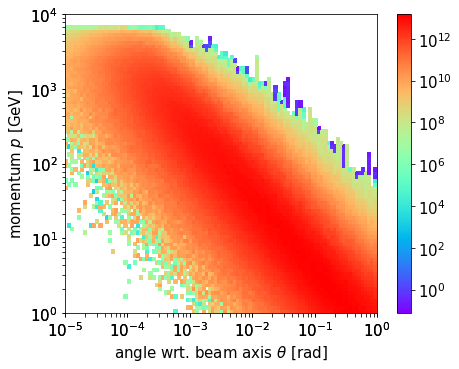

In [8]:
plot=foresee.get_llp_spectrum(mass=mass, coupling=1, do_plot=True)
plot.show()

Next, let us define the configuration of the detector (in terms of position, size and luminosity). Here we choose FASER during 2022/2023 and require the decay channel $S \to \gamma\gamma$ or $\pi^0 \pi^0  \to 4\gamma$. 

In [9]:
foresee.set_detector(
    distance=474, 
    selection="np.sqrt(x.x**2 + (x.y+0.065)**2)<.1", 
    length=3.5, 
    luminosity=60, 
    channels=['gamma', 'pi0_pi0'],
)

For our benchmark point, let us now look at how many particle decay inside the decay volume. We also export 1000 unweighted events as a HEPMC file. 

In [10]:
setupnames = ['EPOSLHC', 'SIBYLL', 'QGSJET', 'PYTHIA']
modes = {'221': ['EPOSLHC', 'SIBYLL', 'QGSJET' , 'Pythia8-Forward'],
         '331': ['EPOSLHC', 'SIBYLL', 'EPOSLHC', 'Pythia8-Forward'],
        }

momenta, weights, _ = foresee.write_events(
    mass = mass, 
    coupling = coupling, 
    energy = energy, 
    numberevent = 1000,
    filename = "model/events/test.hepmc", 
    return_data = True,
    weightnames=setupnames,
    modes=modes,
    nsample=100,
)

for isetup, setup in enumerate(setupnames):
    print("Expected number of events for "+setup+":", round(sum(weights[:,isetup]),3))

Expected number of events for EPOSLHC: 6.455
Expected number of events for SIBYLL: 9.152
Expected number of events for QGSJET: 2.89
Expected number of events for PYTHIA: 5.943


Let us plot the resulting energy distribution

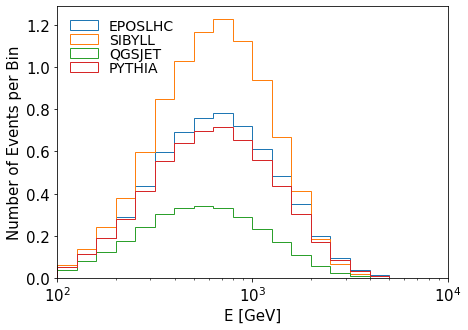

In [11]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
energies = [p.e for p in momenta], 
for isetup, setup in enumerate(setupnames):
    ax.hist(energies, weights=weights[:,isetup], bins=np.logspace(2,4, 20+1), histtype='step', label=setup) 
ax.set_xscale("log")
ax.set_xlim(1e2,1e4) 
ax.set_xlabel("E [GeV]") 
ax.set_ylabel("Number of Events per Bin") 
ax.legend(frameon=False, labelspacing=0, fontsize=14, loc='upper left')
plt.show()

## 3. Sensitivity Reach

In the following, we will obtain the projected sensitivity for the LLP model. For this, we first define a grid of couplings and masses, and then produce the corresponding fluxes. 

In [12]:
masses=[x for x in np.linspace(0.15,0.27,13)]
masses+=[x for x in np.linspace(0.271,0.3,30)]
masses+=[x for x in np.linspace(0.31,0.5,20)]
couplings = np.logspace(-9,-2,71) 

for mass in masses: foresee.get_llp_spectrum(mass=mass,coupling=1)

save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_Pythia8-Forward_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_EPOSLHC_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_SIBYLL_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8-Forward_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_EPOSLHC_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_SIBYLL_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_QGSJET_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_Pythia8-Forward_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_EPOSLHC_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_SIBYLL_m_0.15.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_QGSJET_m_0.15.npy


save data to file: ./model/LLP_spectra/13.6TeV_221_Pythia8-Forward_m_0.22.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_EPOSLHC_m_0.22.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_SIBYLL_m_0.22.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8-Forward_m_0.22.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_EPOSLHC_m_0.22.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_SIBYLL_m_0.22.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_QGSJET_m_0.22.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_Pythia8-Forward_m_0.22.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_EPOSLHC_m_0.22.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_SIBYLL_m_0.22.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_QGSJET_m_0.22.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_Pythia8-Forward_m_0.22.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.23.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m

save data to file: ./model/LLP_spectra/13.6TeV_321_QGSJET_m_0.272.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_Pythia8-Forward_m_0.272.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_EPOSLHC_m_0.272.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_SIBYLL_m_0.272.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_QGSJET_m_0.272.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_Pythia8-Forward_m_0.272.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.273.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.273.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.273.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_Pythia8-Forward_m_0.273.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_EPOSLHC_m_0.273.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_SIBYLL_m_0.273.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8-Forward_m_0.273.npy
save data to file: ./model/LLP_spectra/13.6TeV_

save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_Pythia8-Forward_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_EPOSLHC_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_SIBYLL_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8-Forward_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_EPOSLHC_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_SIBYLL_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_QGSJET_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_Pythia8-Forward_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_EPOSLHC_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_SIBYLL_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_QGSJET_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_Pythia8-Forward_m_0.28.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m

save data to file: ./model/LLP_spectra/13.6TeV_-321_QGSJET_m_0.286.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_Pythia8-Forward_m_0.286.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.287.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.287.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.287.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_Pythia8-Forward_m_0.287.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_EPOSLHC_m_0.287.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_SIBYLL_m_0.287.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8-Forward_m_0.287.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_EPOSLHC_m_0.287.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_SIBYLL_m_0.287.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_QGSJET_m_0.287.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_Pythia8-Forward_m_0.287.npy
save data to file: ./model/LLP_spectra/13.6TeV_-3

save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8-Forward_m_0.294.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_EPOSLHC_m_0.294.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_SIBYLL_m_0.294.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_QGSJET_m_0.294.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_Pythia8-Forward_m_0.294.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_EPOSLHC_m_0.294.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_SIBYLL_m_0.294.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_QGSJET_m_0.294.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_Pythia8-Forward_m_0.294.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.295.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.295.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.295.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_Pythia8-Forward_m_0.295.npy
save data to file: ./model/LLP_spectra/13.6TeV_

save data to file: ./model/LLP_spectra/13.6TeV_-321_Pythia8-Forward_m_0.31.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_EPOSLHC_m_0.32.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_SIBYLL_m_0.32.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_QGSJET_m_0.32.npy
save data to file: ./model/LLP_spectra/13.6TeV_221_Pythia8-Forward_m_0.32.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_EPOSLHC_m_0.32.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_SIBYLL_m_0.32.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8-Forward_m_0.32.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_EPOSLHC_m_0.32.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_SIBYLL_m_0.32.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_QGSJET_m_0.32.npy
save data to file: ./model/LLP_spectra/13.6TeV_321_Pythia8-Forward_m_0.32.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_EPOSLHC_m_0.32.npy
save data to file: ./model/LLP_spectra/13.6TeV_-321_SIBYLL_m_

save data to file: ./model/LLP_spectra/13.6TeV_331_SIBYLL_m_0.44.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8-Forward_m_0.44.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_EPOSLHC_m_0.45.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_SIBYLL_m_0.45.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8-Forward_m_0.45.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_EPOSLHC_m_0.45999999999999996.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_SIBYLL_m_0.45999999999999996.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8-Forward_m_0.45999999999999996.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_EPOSLHC_m_0.47.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_SIBYLL_m_0.47.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_Pythia8-Forward_m_0.47.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_EPOSLHC_m_0.48.npy
save data to file: ./model/LLP_spectra/13.6TeV_331_SIBYLL_m_0.48.npy
save data to file:

We can now plot the `production rate vs mass` using the `foresee.plot_production()` function.

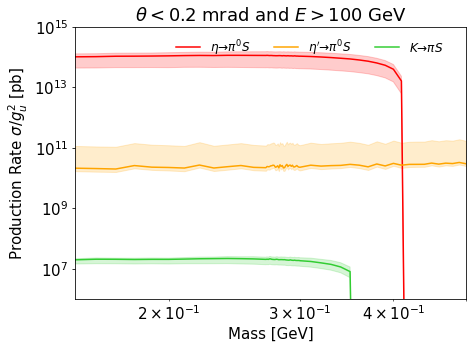

In [13]:
productions=[
    {"channels": ["221"]       , "color": "red"      , "label": r"$\eta \to \pi^0 S$" , "generators": ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward'] },
    {"channels": ["331"]       , "color": "orange"   , "label": r"$\eta' \to \pi^0 S$", "generators": ['EPOSLHC', 'SIBYLL', 'Pythia8-Forward']           },
    {"channels": ["321","-321"], "color": "limegreen", "label": r"$K \to \pi S$"      , "generators": ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward'] },
]

plot=foresee.plot_production(
    masses = masses,
    productions = productions,
    energy=energy,
    condition="logth<-3.7 and logp>2",  
    xlims=[0.15,0.5],ylims=[1e6,1e15],
    xlabel=r"Mass [GeV]",
    ylabel=r"Production Rate $\sigma/g_u^2$ [pb]",
    title=r"$\theta < 0.2$ mrad and $E > 100$ GeV",
    legendloc=(0.97,1),
    fs_label=12,
    ncol=3,
)

Let us now scan over various masses and couplings, and record the resulting number of evets. Note that here we again consider the FASER configuration, which we set up before.

In [14]:
#get reach  
list_nevents = {label:[] for label in setupnames}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings,modes=modes,nsample=10)
    for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  
        
#save results
configuration='default'
for label in setupnames: 
    result = np.array([masses,couplings,list_nevents[label]], dtype='object')
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)

We can now plot the results. For this, we first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [15]:
setups = [ 
    ["13.6TeV_default_EPOSLHC.npy", "EPOS"    , "red"        ,  "solid"  , 0., 3],
    ["13.6TeV_default_SIBYLL.npy" , "SYBILL"  , "magenta"    ,  "solid"  , 0., 3],
    ["13.6TeV_default_QGSJET.npy" , "QGSJET"  , "orange"     ,  "solid"  , 0., 3],
    ["13.6TeV_default_PYTHIA.npy" , "PYTHIA"  , "salmon"     ,  "solid"  , 0., 3],
]

Then we specify all the existing bounds.

In [20]:
bounds = [ 
    ["bounds_BBN.txt"       , "BBN"    , 0.260, 5.0*10**-8, 90  ],
    ["bounds_MAMI.txt"      , "MAMI"   , 0.210, 2.5*10**-3 , 0  ],
    ["bounds_CHARM.txt"     , "CHARM"  , 0.200, 1.5*10**-5 , 0  ],
    ["bounds_CHARM2.txt"    , None     , 0.   , 0.         , 0  ],
    ["bounds_E137.txt"      , "E137"   , 0.215, 2.1*10**-4 , 0 ],
    ["bounds_SN1987.txt"    , "SN1987" , 0.2  , 1.0*10**-8 , 0  ],
    ["bounds_KLOE.txt"      , "KLOE"   , 0.358, 3.4*10**-4 , 90 ],
    ["bounds_BES3.txt"      , "BES3"   , 0.410, 3.0*10**-3 , 0  ],
]

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [21]:
projections = [
    ["limits_SHiP.txt",       "teal",         "SHiP"    , 0.410, 1.0*10**-8, 0  ],
    ["limits_REDTOP.txt",     "dodgerblue",   "REDTOP"  , 0.410, 5.0*10**-6, 0  ],
]

We also want to show the branching fractions for some of the channels (name of file in model/br directory, color, line style, label, x-position, y-position)  

In [22]:
branchings = [
    ["gamma"     , "black"        , "solid" , r"$\gamma\gamma$"         , 0.210, 0.50],
    ["pi0_pi0"   , "blue"         , "solid" , r"$\pi^0\pi^0$"           , 0.240, 0.03],
    ["pi+_pi-"   , "red"          , "solid" , r"$\pi^+\pi^-$"           , 0.290, 0.03],
]

Finally, we can plot everything using `foresee.plot_reach()`. Here we also add the dark matter relict target line obtained in [2105.07077](https://arxiv.org/abs/2105.07077).

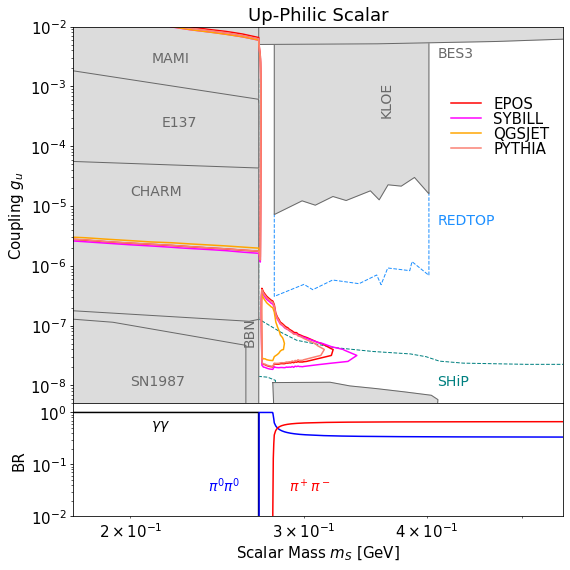

In [23]:
plot, ax, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=projections,
    branchings=branchings,
    title="Up-Philic Scalar", 
    xlims=[0.175,0.55], 
    ylims=[5e-9,1e-2],  
    xlabel=r"Scalar Mass $m_{S}$ [GeV]", 
    ylabel=r"Coupling $g_u$",
    legendloc=(1,0.85),
    figsize=(8,8),
)

plot.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
plot.savefig("Reach_"+modelname+".pdf")
plot.show()